## Scaling
`Scaling` : Merubah interval/skala dari fitur numerik, tujuannya agar antar variabel/fitur itu tidak timpang.

1. Min-Max Scaler
1. Standard Scaler
1. Robust Scaler


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips=sns.load_dataset('tips')
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
92,5.75,1.00,Female,Yes,Fri,Dinner,2
180,34.65,3.68,Male,Yes,Sun,Dinner,4
144,16.43,2.30,Female,No,Thur,Lunch,2
108,18.24,3.76,Male,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4


/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/900370401.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['tip'])
/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/900370401.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


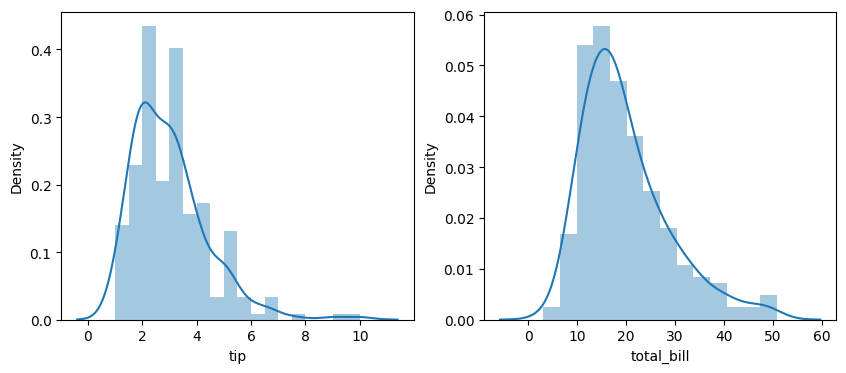

In [3]:
#distribusi awal tip, total_bill
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(tips['tip'])
plt.subplot(1,2,2)
sns.distplot(tips['total_bill'])
plt.show()

In [4]:
# cek statistik deskriptif
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [5]:
X=tips[['tip','total_bill']]

## import library for scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

## Min-Max Scaler
`minmax scaler` : Transform fitur/variabel numerik ke range (0,1)

\begin{align}
{z}_i=\frac{{x}-\min{x}_i}{\max{x}_i-\min{x}_i}
 \end{align}

In [7]:
\begin{align}
{z}_i=\frac{{x}-\min{x}_i}{\max{x}_i-\min{x}_i}
 \end{align}

SyntaxError: unexpected character after line continuation character (1491675695.py, line 1)

In [8]:
X.head()

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59


In [9]:
#minmax : scaling manual
X['tip_scale_minmax_manual']=(X['tip']-X['tip'].min())/(X['tip'].max()-X['tip'].min())
X

/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/2383991243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tip_scale_minmax_manual']=(X['tip']-X['tip'].min())/(X['tip'].max()-X['tip'].min())


,tip,total_bill,tip_scale_minmax_manual
0,1.01,16.99,0.001111
1,1.66,10.34,0.073333
2,3.50,21.01,0.277778
3,3.31,23.68,0.256667
4,3.61,24.59,0.290000
...,...,...,...
239,5.92,29.03,0.546667
240,2.00,27.18,0.111111
241,2.00,22.67,0.111111
242,1.75,17.82,0.083333


# soal 1 : scale total bill dengan minmax (manual)

In [10]:
X['total_bill_scale_minmax_manual']=(X['total_bill']-X['total_bill'].min())/(X['total_bill'].max()-X['total_bill'].min())
X

/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/1582294010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['total_bill_scale_minmax_manual']=(X['total_bill']-X['total_bill'].min())/(X['total_bill'].max()-X['total_bill'].min())


,tip,total_bill,tip_scale_minmax_manual,total_bill_scale_minmax_manual
0,1.01,16.99,0.001111,0.291579
1,1.66,10.34,0.073333,0.152283
2,3.50,21.01,0.277778,0.375786
3,3.31,23.68,0.256667,0.431713
4,3.61,24.59,0.290000,0.450775
...,...,...,...,...
239,5.92,29.03,0.546667,0.543779
240,2.00,27.18,0.111111,0.505027
241,2.00,22.67,0.111111,0.410557
242,1.75,17.82,0.083333,0.308965


In [11]:
#Scaling with sklearn (minmax)

#create scaler
minmax=MinMaxScaler()

#fit-transform scaler
X_minmax=minmax.fit_transform(X[['tip','total_bill']])
X_minmax=pd.DataFrame(X_minmax,columns=['tip_minmax','total_bill_minmax'])
display(X_minmax,X)

,tip_minmax,total_bill_minmax
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


,tip,total_bill,tip_scale_minmax_manual,total_bill_scale_minmax_manual
0,1.01,16.99,0.001111,0.291579
1,1.66,10.34,0.073333,0.152283
2,3.50,21.01,0.277778,0.375786
3,3.31,23.68,0.256667,0.431713
4,3.61,24.59,0.290000,0.450775
...,...,...,...,...
239,5.92,29.03,0.546667,0.543779
240,2.00,27.18,0.111111,0.505027
241,2.00,22.67,0.111111,0.410557
242,1.75,17.82,0.083333,0.308965


/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/3606896050.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['tip'])
/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/3606896050.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])
/var/fo

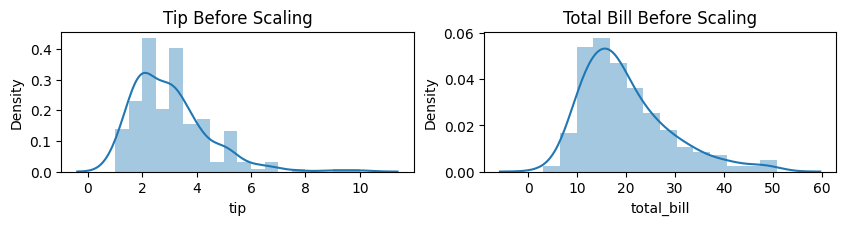

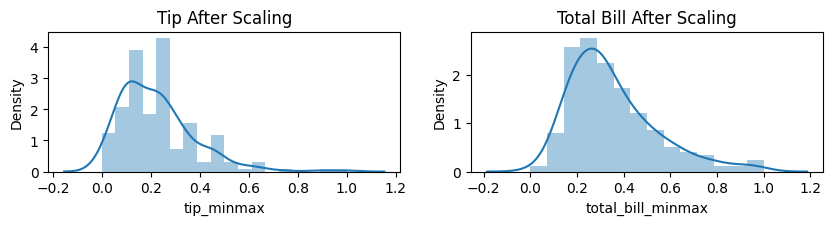

In [12]:
#distribusi awal tip, total_bill
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
sns.distplot(tips['tip'])
plt.title('Tip Before Scaling')
plt.subplot(2,2,2)
sns.distplot(tips['total_bill'])
plt.title('Total Bill Before Scaling')
plt.figure(figsize=(10,4))
plt.subplot(2,2,3)
sns.distplot(X_minmax['tip_minmax'])
plt.title('Tip After Scaling')
plt.subplot(2,2,4)
sns.distplot(X_minmax['total_bill_minmax'])
plt.title('Total Bill After Scaling')
plt.show()

## Standard Scaler
`standar scaler` : Transform fitur/variabel numerik ke data dengan mean=0, standar deviasi=1

\begin{align}
{z}_i=\frac{{x}-\bar{x}}{s}
 \end{align}

In [13]:
X=tips[['tip','total_bill']]
X.head()

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59


In [14]:
#standard scaler : scaling manual
X['tip_scale_standard_manual']=(X['tip']-X['tip'].mean())/(X['tip'].std())
display(X.head(),X.describe())

/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/516903011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tip_scale_standard_manual']=(X['tip']-X['tip'].mean())/(X['tip'].std())


,tip,total_bill,tip_scale_standard_manual
0,1.01,16.99,-1.436993
1,1.66,10.34,-0.967217
2,3.50,21.01,0.362610
3,3.31,23.68,0.225291
4,3.61,24.59,0.442111


,tip,total_bill,tip_scale_standard_manual
count,244.000000,244.000000,2.440000e+02
mean,2.998279,19.785943,2.839259e-16
std,1.383638,8.902412,1.000000e+00
min,1.000000,3.070000,-1.444221e+00
25%,2.000000,13.347500,-7.214882e-01
50%,2.900000,17.795000,-7.102918e-02
75%,3.562500,24.127500,4.077810e-01
max,10.000000,50.810000,5.060370e+00


# soal 2 : scale total bill dengan standard scaler (manual)

In [15]:
X['total_bill_scale_standard_manual']=(X['total_bill']-X['total_bill'].mean())/(X['total_bill'].std())
X.head()

/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/2864204786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['total_bill_scale_standard_manual']=(X['total_bill']-X['total_bill'].mean())/(X['total_bill'].std())


,tip,total_bill,tip_scale_standard_manual,total_bill_scale_standard_manual
0,1.01,16.99,-1.436993,-0.314066
1,1.66,10.34,-0.967217,-1.061054
2,3.50,21.01,0.362610,0.137497
3,3.31,23.68,0.225291,0.437416
4,3.61,24.59,0.442111,0.539635


In [16]:
#Scaling with sklearn (standard scaler)

#create scaler
std_scaler=StandardScaler()

#fit-transform scaler
X_std_scaler=std_scaler.fit_transform(X[['tip','total_bill']])
X_std_scaler=pd.DataFrame(X_std_scaler,columns=['tip_std_scaler','total_bill_std_scaler'])
display(X_std_scaler,X)

,tip_std_scaler,total_bill_std_scaler
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


,tip,total_bill,tip_scale_standard_manual,total_bill_scale_standard_manual
0,1.01,16.99,-1.436993,-0.314066
1,1.66,10.34,-0.967217,-1.061054
2,3.50,21.01,0.362610,0.137497
3,3.31,23.68,0.225291,0.437416
4,3.61,24.59,0.442111,0.539635
...,...,...,...,...
239,5.92,29.03,2.111622,1.038377
240,2.00,27.18,-0.721488,0.830568
241,2.00,22.67,-0.721488,0.323964
242,1.75,17.82,-0.902171,-0.220833


/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/2557995802.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['tip'])
/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/2557995802.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])
/var/fo

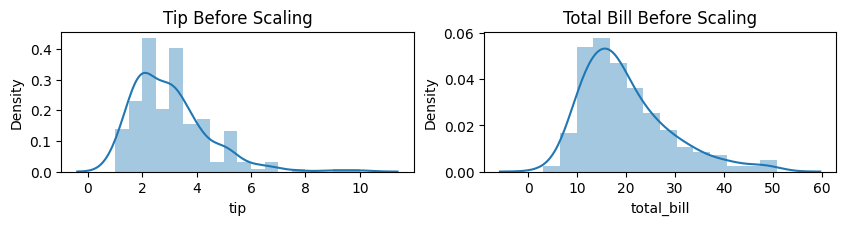

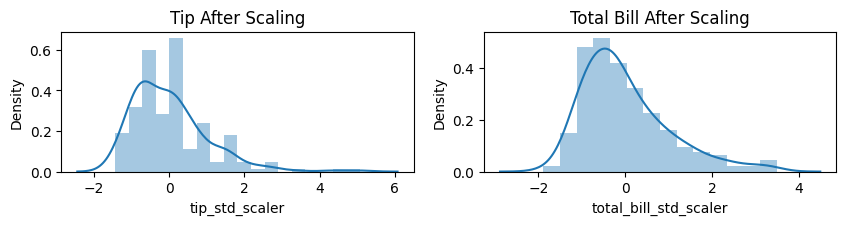

In [17]:
#distribusi awal tip, total_bill
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
sns.distplot(tips['tip'])
plt.title('Tip Before Scaling')
plt.subplot(2,2,2)
sns.distplot(tips['total_bill'])
plt.title('Total Bill Before Scaling')
plt.figure(figsize=(10,4))
plt.subplot(2,2,3)
sns.distplot(X_std_scaler['tip_std_scaler'])
plt.title('Tip After Scaling')
plt.subplot(2,2,4)
sns.distplot(X_std_scaler['total_bill_std_scaler'])
plt.title('Total Bill After Scaling')
plt.show()

## Robust Scaler
`Robust Scaler` : Transform fitur/variabel untuk kolom2 yang distribusinya skew.

\begin{align}
{z}_i=\frac{{x}-{Q}_2({x}_i)}{{Q}_3({x}_i)-{Q}_1({x}_i)}
 \end{align}

In [18]:
X=tips[['tip','total_bill']]
X.head()

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59


In [19]:
#robust scaler : scaling manual
X['tip_scale_robust_manual']=(X['tip']-np.quantile(X['tip'],0.5))/(np.quantile(X['tip'],0.75)-np.quantile(X['tip'],0.25))
display(X.head(),X.describe())

/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/3638200421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tip_scale_robust_manual']=(X['tip']-np.quantile(X['tip'],0.5))/(np.quantile(X['tip'],0.75)-np.quantile(X['tip'],0.25))


,tip,total_bill,tip_scale_robust_manual
0,1.01,16.99,-1.2096
1,1.66,10.34,-0.7936
2,3.50,21.01,0.3840
3,3.31,23.68,0.2624
4,3.61,24.59,0.4544


,tip,total_bill,tip_scale_robust_manual
count,244.000000,244.000000,244.000000
mean,2.998279,19.785943,0.062898
std,1.383638,8.902412,0.885528
min,1.000000,3.070000,-1.216000
25%,2.000000,13.347500,-0.576000
50%,2.900000,17.795000,0.000000
75%,3.562500,24.127500,0.424000
max,10.000000,50.810000,4.544000


# soal 3 : scale total bill dengan robust scaler (manual)

In [20]:
X['total_bill_scale_robust_manual']=(X['total_bill']-np.quantile(X['total_bill'],0.5))/(np.quantile(X['total_bill'],0.75)-np.quantile(X['total_bill'],0.25))
display(X.head(),X.describe())

/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/1425873393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['total_bill_scale_robust_manual']=(X['total_bill']-np.quantile(X['total_bill'],0.5))/(np.quantile(X['total_bill'],0.75)-np.quantile(X['total_bill'],0.25))


,tip,total_bill,tip_scale_robust_manual,total_bill_scale_robust_manual
0,1.01,16.99,-1.2096,-0.074675
1,1.66,10.34,-0.7936,-0.691558
2,3.50,21.01,0.3840,0.298237
3,3.31,23.68,0.2624,0.545918
4,3.61,24.59,0.4544,0.630334


,tip,total_bill,tip_scale_robust_manual,total_bill_scale_robust_manual
count,244.000000,244.000000,244.000000,2.440000e+02
mean,2.998279,19.785943,0.062898,1.846886e-01
std,1.383638,8.902412,0.885528,8.258267e-01
min,1.000000,3.070000,-1.216000,-1.365955e+00
25%,2.000000,13.347500,-0.576000,-4.125696e-01
50%,2.900000,17.795000,0.000000,-1.647987e-16
75%,3.562500,24.127500,0.424000,5.874304e-01
max,10.000000,50.810000,4.544000,3.062616e+00


In [21]:
#Scaling with sklearn (robust scaler)

#create scaler
robust=RobustScaler()

#fit-transform scaler
X_robust=robust.fit_transform(X[['tip','total_bill']])
X_robust=pd.DataFrame(X_robust,columns=['tip_robust','total_bill_robust'])
display(X_robust,X)

,tip_robust,total_bill_robust
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


,tip,total_bill,tip_scale_robust_manual,total_bill_scale_robust_manual
0,1.01,16.99,-1.2096,-0.074675
1,1.66,10.34,-0.7936,-0.691558
2,3.50,21.01,0.3840,0.298237
3,3.31,23.68,0.2624,0.545918
4,3.61,24.59,0.4544,0.630334
...,...,...,...,...
239,5.92,29.03,1.9328,1.042208
240,2.00,27.18,-0.5760,0.870594
241,2.00,22.67,-0.5760,0.452226
242,1.75,17.82,-0.7360,0.002319


/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/1616224388.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['tip'])
/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_14420/1616224388.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])
/var/fo

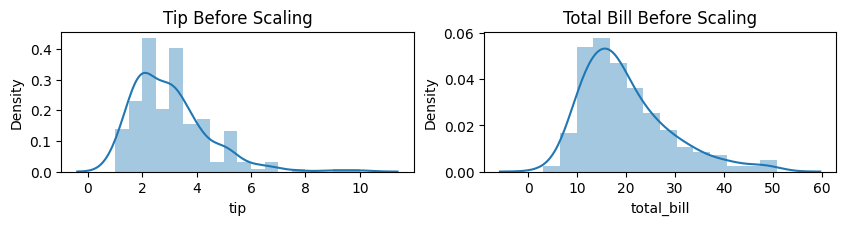

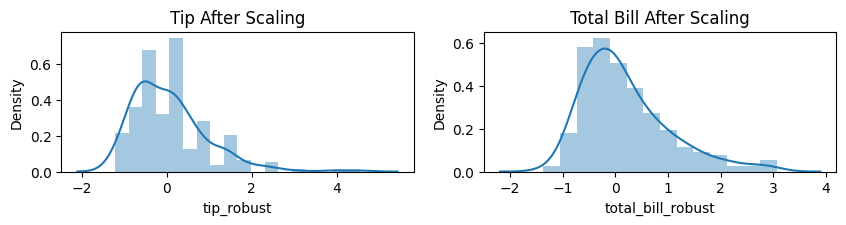

In [22]:
#distribusi awal tip, total_bill
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
sns.distplot(tips['tip'])
plt.title('Tip Before Scaling')
plt.subplot(2,2,2)
sns.distplot(tips['total_bill'])
plt.title('Total Bill Before Scaling')
plt.figure(figsize=(10,4))
plt.subplot(2,2,3)
sns.distplot(X_robust['tip_robust'])
plt.title('Tip After Scaling')
plt.subplot(2,2,4)
sns.distplot(X_robust['total_bill_robust'])
plt.title('Total Bill After Scaling')
plt.show()

## Encoding
`Encoding` : Merubah fitur kategorik menjadi numerik, untuk beberapa model (Linear Model, KNN) tidak bisa menghandle langsung fitur kategoriknya, sehingga diperlukan encoding.

1. One hot Encoder (Nominal, Ordinal), kekurangannya tidak efisien untuk kategorik dengan unique value cukup banyak
1. Ordinal Encoder (Ordinal)
1. Binary Encoder (Nominal)

In [23]:
tips=sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
 for i in tips.select_dtypes(exclude='number').columns:
    display(f'kolom {i}',pd.DataFrame(tips[i].value_counts()).reset_index())
    print('\n')

'kolom sex'

,sex,count
0,Male,157
1,Female,87


'kolom smoker'

,smoker,count
0,No,151
1,Yes,93


'kolom day'

,day,count
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


'kolom time'

,time,count
0,Dinner,176
1,Lunch,68


In [25]:
#one hot untuk 'sex' dan 'smoker'
tips_dummy=pd.get_dummies(tips,columns=['sex','smoker'],dtype=int)
tips_dummy

,total_bill,tip,day,time,size,sex_Male,sex_Female,smoker_Yes,smoker_No
0,16.99,1.01,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,Sun,Dinner,3,1,0,0,1
2,21.01,3.50,Sun,Dinner,3,1,0,0,1
3,23.68,3.31,Sun,Dinner,2,1,0,0,1
4,24.59,3.61,Sun,Dinner,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Sat,Dinner,3,1,0,0,1
240,27.18,2.00,Sat,Dinner,2,0,1,1,0
241,22.67,2.00,Sat,Dinner,2,1,0,1,0
242,17.82,1.75,Sat,Dinner,2,1,0,0,1


## import module for encoding

In [26]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [28]:
#define transformer
transformer=ColumnTransformer([
    ('encoder',OneHotEncoder(),['sex','smoker'])
])

## One Hot Encoder

In [29]:
#encoding: fit-transform
tips_encoded=transformer.fit_transform(tips)
#array to dataframe
tips_encoded=pd.DataFrame(tips_encoded)
#convert float to integer
tips_encoded=tips_encoded.astype(int)
#ganti nama kolom
tips_encoded.columns=transformer.get_feature_names_out()
#gabungkan dengan data yang lama
tips_encoded=pd.concat([tips[['total_bill', 'tip',  'day', 'time', 'size']],tips_encoded],axis=1)
tips_encoded

,total_bill,tip,day,time,size,encoder__sex_Female,encoder__sex_Male,encoder__smoker_No,encoder__smoker_Yes
0,16.99,1.01,Sun,Dinner,2,1,0,1,0
1,10.34,1.66,Sun,Dinner,3,0,1,1,0
2,21.01,3.50,Sun,Dinner,3,0,1,1,0
3,23.68,3.31,Sun,Dinner,2,0,1,1,0
4,24.59,3.61,Sun,Dinner,4,1,0,1,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Sat,Dinner,3,0,1,1,0
240,27.18,2.00,Sat,Dinner,2,1,0,0,1
241,22.67,2.00,Sat,Dinner,2,0,1,0,1
242,17.82,1.75,Sat,Dinner,2,0,1,1,0


In [30]:
#menampilkan nama kolom setelah diencode
transformer.get_feature_names_out()

array(['encoder__sex_Female', 'encoder__sex_Male', 'encoder__smoker_No',
       'encoder__smoker_Yes'], dtype=object)

## Ordinal Encoder

In [31]:
tips['size*']=np.where(tips['size']<=2,'Small',
              np.where(tips['size']<=4,'Medium','Large'))
tips['size*'].value_counts()

size*
Small     160
Medium     75
Large       9
Name: count, dtype: int64

In [32]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,size*
0,16.99,1.01,Female,No,Sun,Dinner,2,Small
1,10.34,1.66,Male,No,Sun,Dinner,3,Medium
2,21.01,3.50,Male,No,Sun,Dinner,3,Medium
3,23.68,3.31,Male,No,Sun,Dinner,2,Small
4,24.59,3.61,Female,No,Sun,Dinner,4,Medium


In [33]:
#encoding: fit-transform
#define transformer
transformer=ColumnTransformer([
    ('encoder',OrdinalEncoder(),['size*'])
])

In [34]:
#encoding: fit-transform
tips_encoded=transformer.fit_transform(tips)
#array to dataframe
tips_encoded=pd.DataFrame(tips_encoded)
#convert float to integer
tips_encoded=tips_encoded.astype(int)
#ganti nama kolom
tips_encoded.columns=transformer.get_feature_names_out()
#gabungkan dengan data yang lama
tips_encoded=pd.concat([tips[['total_bill', 'tip', 'sex','smoker', 'day', 'time', 'size']],tips_encoded],axis=1)
tips_encoded

,total_bill,tip,sex,smoker,day,time,size,encoder__size*
0,16.99,1.01,Female,No,Sun,Dinner,2,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2
242,17.82,1.75,Male,No,Sat,Dinner,2,2


# soal 4 
lakukan one hot encoder untuk kolom-kolom sex, smoker, time, dan ordinal encoder untuk kolom size, dengan kolom size isinya (small, medium, large)

In [35]:
tips=sns.load_dataset('tips')
tips['size']=np.where(tips['size']<=2,'Small',
              np.where(tips['size']<=4,'Medium','Large'))
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
160,21.50,3.50,Male,No,Sun,Dinner,Medium
20,17.92,4.08,Male,No,Sat,Dinner,Small
18,16.97,3.50,Female,No,Sun,Dinner,Medium
46,22.23,5.00,Male,No,Sun,Dinner,Small
186,20.90,3.50,Female,Yes,Sun,Dinner,Medium


In [36]:
#define transformer
transformer=ColumnTransformer([
    ('one hot encoder',OneHotEncoder(),['sex','smoker','time']),
    ('ordinal encoder',OrdinalEncoder(),['size'])
])

In [37]:
#encoding: fit-transform
tips_encoded=transformer.fit_transform(tips)
#array to dataframe
tips_encoded=pd.DataFrame(tips_encoded)
#convert float to integer
tips_encoded=tips_encoded.astype(int)
#ganti nama kolom
tips_encoded.columns=transformer.get_feature_names_out()
#gabungkan dengan data yang lama
tips_encoded=pd.concat([tips[['total_bill', 'tip','day']],tips_encoded],axis=1)
tips_encoded

,total_bill,tip,day,one hot encoder__sex_Female,one hot encoder__sex_Male,one hot encoder__smoker_No,one hot encoder__smoker_Yes,one hot encoder__time_Dinner,one hot encoder__time_Lunch,ordinal encoder__size
0,16.99,1.01,Sun,1,0,1,0,1,0,2
1,10.34,1.66,Sun,0,1,1,0,1,0,1
2,21.01,3.50,Sun,0,1,1,0,1,0,1
3,23.68,3.31,Sun,0,1,1,0,1,0,2
4,24.59,3.61,Sun,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Sat,0,1,1,0,1,0,1
240,27.18,2.00,Sat,1,0,0,1,1,0,2
241,22.67,2.00,Sat,0,1,0,1,1,0,2
242,17.82,1.75,Sat,0,1,1,0,1,0,2


## Binary Encoder

In [38]:
tips_encoded.head()

,total_bill,tip,day,one hot encoder__sex_Female,one hot encoder__sex_Male,one hot encoder__smoker_No,one hot encoder__smoker_Yes,one hot encoder__time_Dinner,one hot encoder__time_Lunch,ordinal encoder__size
0,16.99,1.01,Sun,1,0,1,0,1,0,2
1,10.34,1.66,Sun,0,1,1,0,1,0,1
2,21.01,3.50,Sun,0,1,1,0,1,0,1
3,23.68,3.31,Sun,0,1,1,0,1,0,2
4,24.59,3.61,Sun,1,0,1,0,1,0,1


In [39]:
#manual
#create encoder
binary=ce.BinaryEncoder(cols=['day'])
#fit-transform
tips_encoded_bin=binary.fit_transform(tips_encoded)
tips_encoded_bin

,total_bill,tip,day_0,day_1,day_2,one hot encoder__sex_Female,one hot encoder__sex_Male,one hot encoder__smoker_No,one hot encoder__smoker_Yes,one hot encoder__time_Dinner,one hot encoder__time_Lunch,ordinal encoder__size
0,16.99,1.01,0,0,1,1,0,1,0,1,0,2
1,10.34,1.66,0,0,1,0,1,1,0,1,0,1
2,21.01,3.50,0,0,1,0,1,1,0,1,0,1
3,23.68,3.31,0,0,1,0,1,1,0,1,0,2
4,24.59,3.61,0,0,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,0,0,1,1,0,1,0,1
240,27.18,2.00,0,1,0,1,0,0,1,1,0,2
241,22.67,2.00,0,1,0,0,1,0,1,1,0,2
242,17.82,1.75,0,1,0,0,1,1,0,1,0,2


In [40]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [41]:
#define transformer
transformer=ColumnTransformer([
    ('one hot encoder',OneHotEncoder(drop='first'),['sex','smoker','time']),
    ('ordinal encoder',OrdinalEncoder(),['size']),
    ('binary encoder',ce.BinaryEncoder(),['day']),
])

In [42]:
#encoding: fit-transform
tips_encoded_final=transformer.fit_transform(tips)
#array to dataframe
tips_encoded_final=pd.DataFrame(tips_encoded_final)
#convert float to integer
tips_encoded_final=tips_encoded_final.astype(int)
#ganti nama kolom
tips_encoded_final.columns=transformer.get_feature_names_out()
#gabungkan dengan data yang lama
tips_encoded_final=pd.concat([tips[['total_bill', 'tip']],tips_encoded_final],axis=1)
tips_encoded_final

,total_bill,tip,one hot encoder__sex_Male,one hot encoder__smoker_Yes,one hot encoder__time_Lunch,ordinal encoder__size,binary encoder__day_0,binary encoder__day_1,binary encoder__day_2
0,16.99,1.01,0,0,0,2,0,0,1
1,10.34,1.66,1,0,0,1,0,0,1
2,21.01,3.50,1,0,0,1,0,0,1
3,23.68,3.31,1,0,0,2,0,0,1
4,24.59,3.61,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,0,1,0,1,0
240,27.18,2.00,0,1,0,2,0,1,0
241,22.67,2.00,1,1,0,2,0,1,0
242,17.82,1.75,1,0,0,2,0,1,0


In [43]:
# sns.get_dataset_names()

In [44]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## data: titanic (seaborn) 

## target: survived 

## data preprocessing:

1. one hot encoding: sex,deck(null diganti jadi modus)
2. ordinal encoder : class, embarked (null diganti jadi modus)
3. binary encoding: alone
3. robust scaler: age (null diganti mean)
4. standard scaler : fare

## Modelling
Random state 2020, data splitting 80:20 model Decision Tree dan KNN 

## Evaluation Parameter
tree : Cek akurasinya berdasarkan max depth (0,20,1)
knn : Cek akurasi berdasarkan n_neighbours (0,15, 1)

In [45]:
#import data
df=sns.load_dataset('titanic')
df.sample(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
236,0,2,male,44.0,1,0,26.0000,S,Second,man,True,NaN,Southampton,no,False
306,1,1,female,NaN,0,0,110.8833,C,First,woman,False,NaN,Cherbourg,yes,True
281,0,3,male,28.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
483,1,3,female,63.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,yes,True
760,0,3,male,NaN,0,0,14.5000,S,Third,man,True,NaN,Southampton,no,True
516,1,2,female,34.0,0,0,10.5000,S,Second,woman,False,F,Southampton,yes,True


In [46]:
#cek statistik deskriptif
display(df.describe(),df.describe(exclude='number'))

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


In [47]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [48]:
#feature 
X=df[[ 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class','deck', 
        'alone']]

#label
y=df['survived']

In [49]:
from sklearn.model_selection import train_test_split
## split data
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=2020)

## impute Missing Value

deck,embarked : modus

age : mean


In [50]:
#age
X_train['age']=round(X_train['age'].fillna(X_train['age'].mean())).astype(int)
X_test['age']=round(X_test['age'].fillna(X_test['age'].mean())).astype(int)

#deck
X_train['deck']=X_train['deck'].fillna(X_train['deck'].mode()[0])
X_test['deck']=X_test['deck'].fillna(X_test['deck'].mode()[0])


#
X_train['embarked']=X_train['embarked'].fillna(X_train['embarked'].mode()[0])
X_test['embarked']=X_test['embarked'].fillna(X_test['embarked'].mode()[0])

# display(X_train.isna().sum(),X_test.isna().sum())

## preprocess:

1. one hot encoding: sex,deck(null diganti jadi modus)
2. ordinal encoder : class, embarked (null diganti jadi modus)
3. binary encoding: alone
3. robust scaler: age (null diganti mean)
4. standard scaler : fare


In [51]:
#define transformer
transformer=ColumnTransformer([
    ('one hot encoder',OneHotEncoder(drop='first'),['sex','deck']),
    ('ordinal encoder',OrdinalEncoder(),['class','embarked']),
    ('binary encoder',ce.BinaryEncoder(),['alone']),
    ('robust scaler',RobustScaler(),['age']),
    ('standard scaler',StandardScaler(),['fare']),
])

In [52]:
#fit encoder & scaler
transformer.fit(X_train)

#transform
X_train_preprocessed=transformer.transform(X_train)
X_test_preprocessed=transformer.transform(X_test)



# #array to dataframe
X_train_preprocessed=pd.DataFrame(X_train_preprocessed)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed)


# #ganti nama kolom
X_train_preprocessed.columns=transformer.get_feature_names_out()
X_test_preprocessed.columns=transformer.get_feature_names_out()

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
X_train_preprocessed.reset_index(drop=True,inplace=True)
X_test_preprocessed.reset_index(drop=True,inplace=True)


# #gabungkan dengan data yang lama
X_train_preprocessed=pd.concat([X_train[['sibsp', 'parch']],X_train_preprocessed],axis=1)
X_test_preprocessed=pd.concat([X_test[['sibsp', 'parch']],X_test_preprocessed],axis=1)

display(X_train_preprocessed,X_test_preprocessed)

,sibsp,parch,one hot encoder__sex_male,one hot encoder__deck_B,one hot encoder__deck_C,one hot encoder__deck_D,one hot encoder__deck_E,one hot encoder__deck_F,one hot encoder__deck_G,ordinal encoder__class,ordinal encoder__embarked,binary encoder__alone,robust scaler__age,standard scaler__fare
0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.846154,-0.376870
1,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,-0.615385,-0.472947
2,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,-0.076923,-0.496966
3,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,-0.059817
4,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.769231,-0.348047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.461538,-0.138840
708,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,-0.146286
709,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.615385,1.083496
710,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.615385,-0.496966


,sibsp,parch,one hot encoder__sex_male,one hot encoder__deck_B,one hot encoder__deck_C,one hot encoder__deck_D,one hot encoder__deck_E,one hot encoder__deck_F,one hot encoder__deck_G,ordinal encoder__class,ordinal encoder__embarked,binary encoder__alone,robust scaler__age,standard scaler__fare
0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.000000,-0.496966
1,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.230769,-0.494164
2,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,-0.230769,-0.146286
3,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.307692,0.875970
4,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,-0.307692,-0.493603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.000000,-0.521946
175,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,-0.769231,-0.457094
176,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.461538,-0.347086
177,3,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,-2.153846,-0.109777


## Modelling Decision Tree
`with scaling`

In [53]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [54]:
max_depth=np.arange(1,20,1)
#train
list1=[]
list2=[]
for i in max_depth:
    #create model
    tree=DecisionTreeRegressor(max_depth=i,random_state=2020)
    #fit model
    tree.fit(X_train_preprocessed, y_train)
    #predict train
    y_pred_train=tree.predict(X_train_preprocessed)
    list1.append(accuracy_score(y_train,y_pred_train))
    #predict test
    y_pred_test=tree.predict(X_test_preprocessed)
    list2.append(accuracy_score(y_test,y_pred_test))
  
df_tree=pd.DataFrame({'max_depth':max_depth,'accuracy_train':list1,'accuracy_test':list2})
df_tree

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_tree,x='max_depth',y='accuracy_train',label='Train',marker='o')
sns.lineplot(data=df_tree,x='max_depth',y='accuracy_test',label='Test',marker='o')

#underfit
text_plot1='Underfit'
plt.axvline(x=1,linestyle='--')
plt.text(1.05,0.91,text_plot1,fontsize=9.5)

#overfit
text_plot2='Overfit'
plt.axvline(x=19,linestyle='--')
plt.text(17.2,0.91,text_plot2,fontsize=9.5)

# #Just Right
text_plot3='Just Right'
plt.axvline(x=7,linestyle='--')
plt.text(7.1,0.85,text_plot3,fontsize=9.5)

plt.title('Train vs Test Accuracy with Decision Tree')
plt.xticks(np.arange(0,21,5))
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.tree import plot_tree

#create model
tree=DecisionTreeClassifier(max_depth=7,random_state=2020)
#fit model
tree.fit(X_train_preprocessed, y_train)
#predict test
y_pred_test=tree.predict(X_test_preprocessed)

plt.figure(figsize=(100,50))
plot_tree(tree,feature_names=X_test_preprocessed.columns,class_names=['Survived','Not_Survived'],filled=True)
plt.show()

## Modelling KNN
`with scaling`

In [ ]:
k=np.arange(1,22,2)
#train
list1=[]
list2=[]
for i in k:
    #create model
    knn_scale=KNeighborsClassifier(n_neighbors=i)
    #fit model
    knn_scale.fit(X_train_preprocessed, y_train)
    #predict
    y_pred_with_scale=knn_scale.predict(X_train_preprocessed)
    list1.append(accuracy_score(y_train,y_pred_with_scale))
    y_pred_with_scale=knn_scale.predict(X_test_preprocessed)
    list2.append(accuracy_score(y_test,y_pred_with_scale))
    

        
  
df_knn=pd.DataFrame({'k':k,'accuracy_train':list1,'accuracy_test':list2})
df_knn

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_knn,x='k',y='accuracy_train',label='Train')
sns.lineplot(data=df_knn,x='k',y='accuracy_test',label='Test')
plt.title('Train vs Test Accuracy with KNN')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

# #Just Right
text_plot3='Just Right'
plt.axvline(x=7,linestyle='--')
plt.text(7.55,0.90,text_plot3,fontsize=9.5)

plt.show()

## Exercise

In [55]:
#import data
df=sns.load_dataset('tips')
df.sample(7)

,total_bill,tip,sex,smoker,day,time,size
202,13.00,2.00,Female,Yes,Thur,Lunch,2
28,21.70,4.30,Male,No,Sat,Dinner,2
77,27.20,4.00,Male,No,Thur,Lunch,4
156,48.17,5.00,Male,No,Sun,Dinner,6
0,16.99,1.01,Female,No,Sun,Dinner,2
51,10.29,2.60,Female,No,Sun,Dinner,2
159,16.49,2.00,Male,No,Sun,Dinner,4


In [56]:
#cek statistik deskriptif
display(df.describe(),df.describe(exclude='number'))

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [57]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [58]:
#feature 
X=df[[ 'total_bill', 'sex', 'smoker', 'day', 'time', 'size']]

#label
y=df[ 'tip']

In [59]:
from sklearn.model_selection import train_test_split
## split data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

## impute Missing Value

tidak ada yang missing


In [60]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## preprocess:

preprocess:
1. one hot encoding: sex, smoker, time 

2. binary encoding: day

3. robust scaler: total_bill

4. no treatment: size


In [61]:
#define transformer
transformer=ColumnTransformer([
    ('one hot encoder',OneHotEncoder(drop='first'),['sex','smoker','time']),
    ('binary encoder',ce.BinaryEncoder(),['day']),
    ('robust scaler',RobustScaler(),['total_bill']),
])

In [62]:
#fit encoder & scaler
transformer.fit(X_train)

#transform
X_train_preprocessed=transformer.transform(X_train)
X_test_preprocessed=transformer.transform(X_test)



# #array to dataframe
X_train_preprocessed=pd.DataFrame(X_train_preprocessed)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed)


# #ganti nama kolom
X_train_preprocessed.columns=transformer.get_feature_names_out()
X_test_preprocessed.columns=transformer.get_feature_names_out()

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
X_train_preprocessed.reset_index(drop=True,inplace=True)
X_test_preprocessed.reset_index(drop=True,inplace=True)


# #gabungkan dengan data yang lama
X_train_preprocessed=pd.concat([X_train[['size']],X_train_preprocessed],axis=1)
X_test_preprocessed=pd.concat([X_test[['size']],X_test_preprocessed],axis=1)

display(X_train_preprocessed,X_test_preprocessed)

,size,one hot encoder__sex_Male,one hot encoder__smoker_Yes,one hot encoder__time_Lunch,binary encoder__day_0,binary encoder__day_1,binary encoder__day_2,robust scaler__total_bill
0,3,1.0,0.0,0.0,0.0,0.0,1.0,1.260554
1,2,1.0,0.0,1.0,0.0,1.0,0.0,0.081253
2,2,0.0,1.0,0.0,0.0,0.0,1.0,-0.613255
3,2,1.0,0.0,0.0,0.0,0.0,1.0,-0.524285
4,2,0.0,0.0,1.0,0.0,1.0,0.0,-0.086700
...,...,...,...,...,...,...,...,...
165,3,1.0,0.0,0.0,0.0,0.0,1.0,0.018611
166,2,1.0,0.0,0.0,0.0,1.0,1.0,0.380844
167,2,1.0,0.0,0.0,0.0,0.0,1.0,-0.372674
168,6,0.0,0.0,1.0,0.0,1.0,0.0,1.127099


,size,one hot encoder__sex_Male,one hot encoder__smoker_Yes,one hot encoder__time_Lunch,binary encoder__day_0,binary encoder__day_1,binary encoder__day_2,robust scaler__total_bill
0,3,0.0,0.0,0.0,0.0,1.0,1.0,-0.106673
1,2,1.0,1.0,0.0,0.0,0.0,1.0,0.263731
2,2,1.0,1.0,0.0,0.0,0.0,1.0,-0.324557
3,4,1.0,1.0,0.0,0.0,0.0,1.0,0.082161
4,2,1.0,1.0,0.0,0.0,0.0,1.0,-0.215615
...,...,...,...,...,...,...,...,...
69,5,1.0,0.0,1.0,0.0,1.0,0.0,2.161144
70,2,0.0,0.0,0.0,0.0,0.0,1.0,-0.211076
71,2,1.0,0.0,0.0,0.0,0.0,1.0,0.039492
72,4,1.0,0.0,0.0,0.0,1.0,1.0,0.862006


## Modelling Ridge


In [63]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error

In [64]:
#create model
ridge=Ridge(random_state=10)
#fit model
ridge.fit(X_train_preprocessed, y_train)
#predict X_train
y_pred_train=ridge.predict(X_train_preprocessed)
#predict X_test
y_pred_test=ridge.predict(X_test_preprocessed)


In [65]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error

hyperparam_c=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
mse_train=[]
mse_test=[]

for i in hyperparam_c:
    #create model
    ridge=Ridge(alpha=i,random_state=2020)
    #fit model
    ridge.fit(X_train_preprocessed, y_train)
    #predict X_train
    y_pred_train=ridge.predict(X_train_preprocessed)
    mse_train.append(mean_squared_error(y_train,y_pred_train))
    #predict X_test
    y_pred_test=ridge.predict(X_test_preprocessed)
    mse_test.append(mean_squared_error(y_test,y_pred_test))
  
df_ridge=pd.DataFrame({'Alpha':hyperparam_c,'MSE_train':mse_train,'MSE_test':mse_test})
df_ridge


,Alpha,MSE_train,MSE_test
0,100000.000,1.994758,1.694282
1,10000.000,1.964651,1.665572
2,1000.000,1.735213,1.449114
3,100.000,1.202310,0.998512
4,10.000,1.028954,0.984247
5,1.000,1.018944,1.029093
6,0.100,1.018577,1.036084
7,0.001,1.018569,1.036975


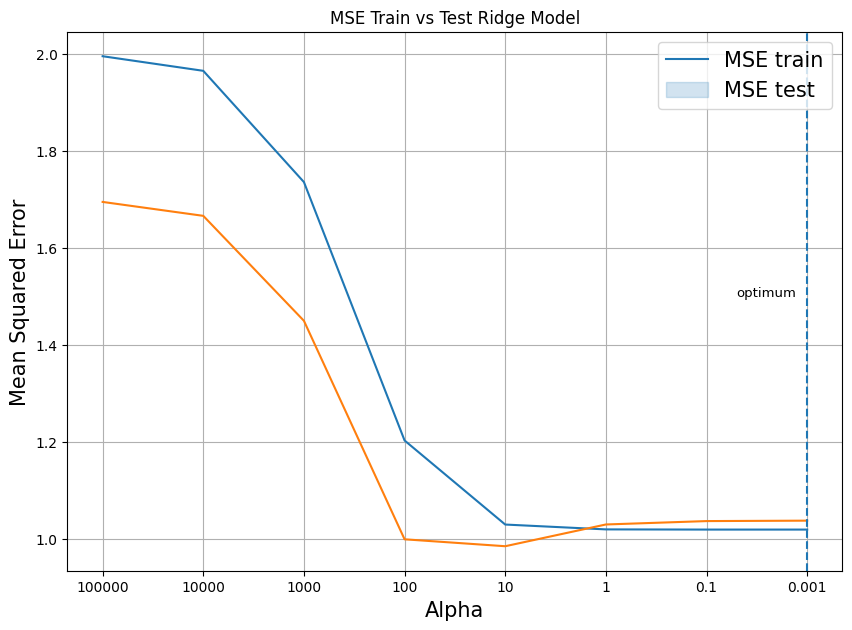

In [66]:
length=range(len(hyperparam_c))

plt.figure(figsize=(10,7))
sns.lineplot(x=length,y=df_ridge['MSE_train'])
sns.lineplot(x=length,y=df_ridge['MSE_test'])
plt.legend(['MSE train', 'MSE test'],fontsize=15,loc='upper right')
plt.xlabel('Alpha',fontsize=15)
plt.ylabel('Mean Squared Error',fontsize=15)
plt.title('MSE Train vs Test Ridge Model')
plt.xticks(length,hyperparam_c)

# # #optimum
text_plot3='optimum'
plt.axvline(x=7,linestyle='--')
plt.text(6.3,1.5,text_plot3,fontsize=9.5)


plt.grid()
plt.show()

`Insight` : 

1. Saat alpha diatur ke nilai yang rendah, model makin optimum

1. Nilai alpha yang tinggi menambah MSE untuk kedua data, baik train maupun test

1. alpha terbaik untuk kasus ini adalah 0.001, dengan MSE pada data test sebesar 1.28 

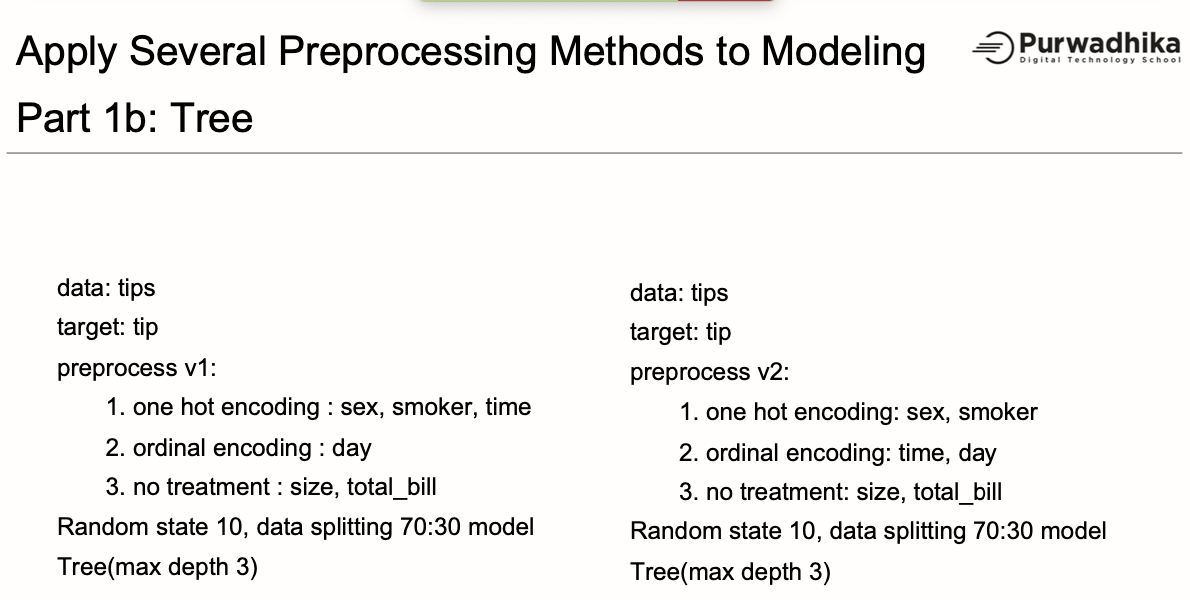

In [67]:
#import data
df=sns.load_dataset('tips')
df.sample(7)

,total_bill,tip,sex,smoker,day,time,size
202,13.00,2.00,Female,Yes,Thur,Lunch,2
78,22.76,3.00,Male,No,Thur,Lunch,2
180,34.65,3.68,Male,Yes,Sun,Dinner,4
54,25.56,4.34,Male,No,Sun,Dinner,4
120,11.69,2.31,Male,No,Thur,Lunch,2
238,35.83,4.67,Female,No,Sat,Dinner,3
62,11.02,1.98,Male,Yes,Sat,Dinner,2


In [68]:
#cek statistik deskriptif
display(df.describe(),df.describe(exclude='number'))

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [69]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [70]:
#feature 
X=df[[ 'total_bill', 'sex', 'smoker', 'day', 'time', 'size']]

#label
y=df[ 'tip']

In [71]:
from sklearn.model_selection import train_test_split
## split data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

## impute Missing Value

tidak ada yang missing


In [72]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## preprocess:

preprocess:
1. one hot encoding: sex, smoker, time 

2. binary encoding: day

3. robust scaler: total_bill

4. no treatment: size


In [73]:
#define transformer
transformer=ColumnTransformer([
    ('one hot encoder',OneHotEncoder(drop='first'),['sex','smoker','time']),
    ('ordinal encoder',OrdinalEncoder(),['day']),
])

In [74]:
#fit encoder & scaler
transformer.fit(X_train)

#transform
X_train_preprocessed=transformer.transform(X_train)
X_test_preprocessed=transformer.transform(X_test)



# #array to dataframe
X_train_preprocessed=pd.DataFrame(X_train_preprocessed)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed)


# #ganti nama kolom
X_train_preprocessed.columns=transformer.get_feature_names_out()
X_test_preprocessed.columns=transformer.get_feature_names_out()

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
X_train_preprocessed.reset_index(drop=True,inplace=True)
X_test_preprocessed.reset_index(drop=True,inplace=True)


# #gabungkan dengan data yang lama
X_train_preprocessed=pd.concat([X_train[['size','total_bill']],X_train_preprocessed],axis=1)
X_test_preprocessed=pd.concat([X_test[['size','total_bill']],X_test_preprocessed],axis=1)

display(X_train_preprocessed,X_test_preprocessed)

,size,total_bill,one hot encoder__sex_Male,one hot encoder__smoker_Yes,one hot encoder__time_Lunch,ordinal encoder__day
0,3,31.27,1.0,0.0,0.0,1.0
1,2,18.28,1.0,0.0,1.0,3.0
2,2,10.63,0.0,1.0,0.0,1.0
3,2,11.61,1.0,0.0,0.0,1.0
4,2,16.43,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...
165,3,17.59,1.0,0.0,0.0,1.0
166,2,21.58,1.0,0.0,0.0,2.0
167,2,13.28,1.0,0.0,0.0,1.0
168,6,29.80,0.0,0.0,1.0,3.0


,size,total_bill,one hot encoder__sex_Male,one hot encoder__smoker_Yes,one hot encoder__time_Lunch,ordinal encoder__day
0,3,16.21,0.0,0.0,0.0,2.0
1,2,20.29,1.0,1.0,0.0,1.0
2,2,13.81,1.0,1.0,0.0,1.0
3,4,18.29,1.0,1.0,0.0,1.0
4,2,15.01,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...
69,5,41.19,1.0,0.0,1.0,3.0
70,2,15.06,0.0,0.0,0.0,1.0
71,2,17.82,1.0,0.0,0.0,1.0
72,4,26.88,1.0,0.0,0.0,2.0


## Modelling Decision Tree
`with scaling`

In [75]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [76]:
max_depth=np.arange(1,15,1)
#train
list1=[]
list2=[]
for i in max_depth:
    #create model
    tree=DecisionTreeRegressor(max_depth=i,random_state=10)
    #fit model
    tree.fit(X_train_preprocessed, y_train)
    #predict train
    y_pred_train=tree.predict(X_train_preprocessed)
    list1.append(mean_squared_error(y_train,y_pred_train))
    #predict test
    y_pred_test=tree.predict(X_test_preprocessed)
    list2.append(mean_squared_error(y_test,y_pred_test))
  
df_tree=pd.DataFrame({'max_depth':max_depth,'MSE_train':list1,'MSE_test':list2})
df_tree

,max_depth,MSE_train,MSE_test
0,1,1.422013,1.206870
1,2,0.937341,0.926383
2,3,0.774216,0.829258
3,4,0.617030,0.949149
4,5,0.381604,1.186743
5,6,0.242638,1.538170
6,7,0.168826,1.770327
7,8,0.100056,1.894859
8,9,0.057272,1.986330
9,10,0.011677,1.951938


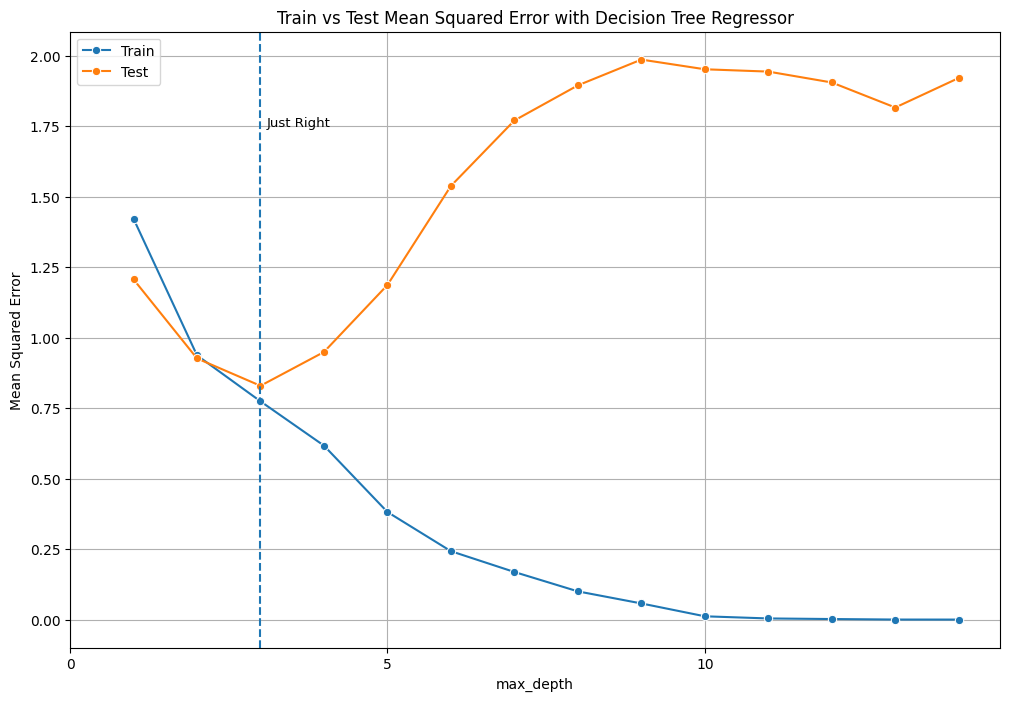

In [77]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_tree,x='max_depth',y='MSE_train',label='Train',marker='o')
sns.lineplot(data=df_tree,x='max_depth',y='MSE_test',label='Test',marker='o')

#underfit
# text_plot1='Underfit'
# plt.axvline(x=1,linestyle='--')
# plt.text(1.05,0.91,text_plot1,fontsize=9.5)

# #overfit
# text_plot2='Overfit'
# plt.axvline(x=19,linestyle='--')
# plt.text(17.2,0.91,text_plot2,fontsize=9.5)

# # #Just Right
text_plot3='Just Right'
plt.axvline(x=3,linestyle='--')
plt.text(3.1,1.75,text_plot3,fontsize=9.5)

plt.title('Train vs Test Mean Squared Error with Decision Tree Regressor')
plt.xticks(np.arange(0,15,5))
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

## preprocess:

preprocess:
1. one hot encoding: sex, smoker

2. ordinal encoding: time, day

4. no treatment: size, total_bill


In [78]:
#define transformer
transformer=ColumnTransformer([
    ('one hot encoder',OneHotEncoder(drop='first'),['sex','smoker']),
    ('ordinal encoder',OrdinalEncoder(),['day','time']),
])

In [79]:
#fit encoder & scaler
transformer.fit(X_train)

#transform
X_train_preprocessed=transformer.transform(X_train)
X_test_preprocessed=transformer.transform(X_test)



# #array to dataframe
X_train_preprocessed=pd.DataFrame(X_train_preprocessed)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed)


# #ganti nama kolom
X_train_preprocessed.columns=transformer.get_feature_names_out()
X_test_preprocessed.columns=transformer.get_feature_names_out()

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
X_train_preprocessed.reset_index(drop=True,inplace=True)
X_test_preprocessed.reset_index(drop=True,inplace=True)


# #gabungkan dengan data yang lama
X_train_preprocessed=pd.concat([X_train[['size','total_bill']],X_train_preprocessed],axis=1)
X_test_preprocessed=pd.concat([X_test[['size','total_bill']],X_test_preprocessed],axis=1)

display(X_train_preprocessed,X_test_preprocessed)

,size,total_bill,one hot encoder__sex_Male,one hot encoder__smoker_Yes,ordinal encoder__day,ordinal encoder__time
0,3,31.27,1.0,0.0,1.0,0.0
1,2,18.28,1.0,0.0,3.0,1.0
2,2,10.63,0.0,1.0,1.0,0.0
3,2,11.61,1.0,0.0,1.0,0.0
4,2,16.43,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...
165,3,17.59,1.0,0.0,1.0,0.0
166,2,21.58,1.0,0.0,2.0,0.0
167,2,13.28,1.0,0.0,1.0,0.0
168,6,29.80,0.0,0.0,3.0,1.0


,size,total_bill,one hot encoder__sex_Male,one hot encoder__smoker_Yes,ordinal encoder__day,ordinal encoder__time
0,3,16.21,0.0,0.0,2.0,0.0
1,2,20.29,1.0,1.0,1.0,0.0
2,2,13.81,1.0,1.0,1.0,0.0
3,4,18.29,1.0,1.0,1.0,0.0
4,2,15.01,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...
69,5,41.19,1.0,0.0,3.0,1.0
70,2,15.06,0.0,0.0,1.0,0.0
71,2,17.82,1.0,0.0,1.0,0.0
72,4,26.88,1.0,0.0,2.0,0.0


## Modelling Decision Tree
`with scaling`

In [80]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [81]:
max_depth=np.arange(1,15,1)
#train
list1=[]
list2=[]
for i in max_depth:
    #create model
    tree=DecisionTreeRegressor(max_depth=i,random_state=10)
    #fit model
    tree.fit(X_train_preprocessed, y_train)
    #predict train
    y_pred_train=tree.predict(X_train_preprocessed)
    list1.append(mean_squared_error(y_train,y_pred_train))
    #predict test
    y_pred_test=tree.predict(X_test_preprocessed)
    list2.append(mean_squared_error(y_test,y_pred_test))
  
df_tree=pd.DataFrame({'max_depth':max_depth,'MSE_train':list1,'MSE_test':list2})
df_tree

,max_depth,MSE_train,MSE_test
0,1,1.422013,1.206870
1,2,0.937341,0.926383
2,3,0.774216,0.829258
3,4,0.617030,0.949149
4,5,0.381604,1.210313
5,6,0.242638,1.559955
6,7,0.168826,1.761598
7,8,0.100056,1.894859
8,9,0.057272,1.986330
9,10,0.011677,1.942996


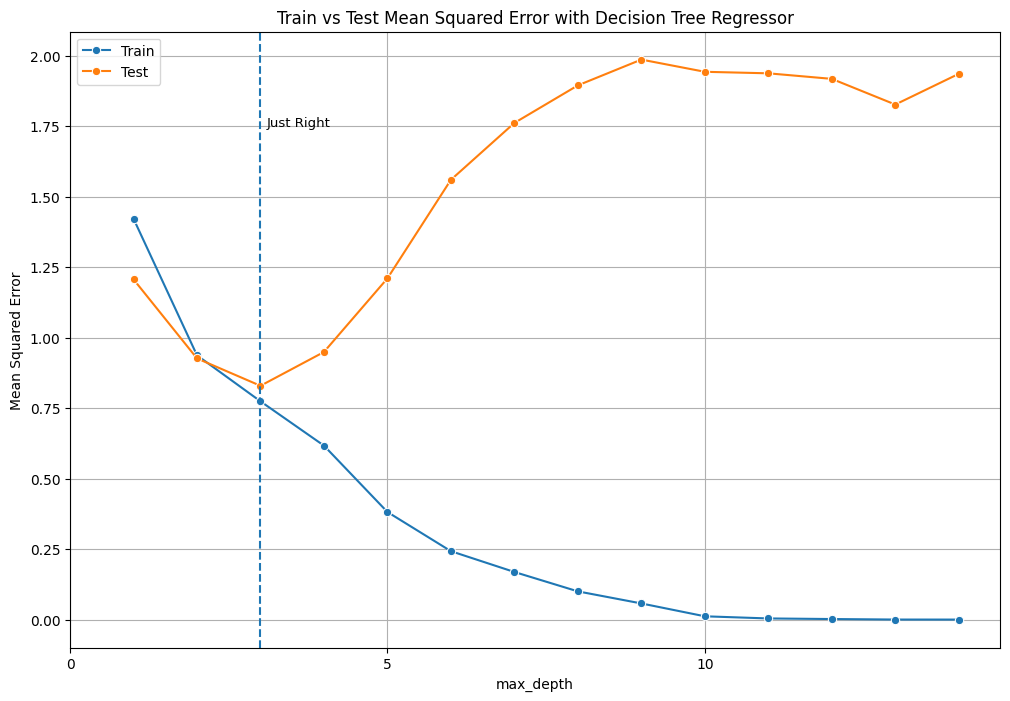

In [82]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_tree,x='max_depth',y='MSE_train',label='Train',marker='o')
sns.lineplot(data=df_tree,x='max_depth',y='MSE_test',label='Test',marker='o')

#underfit
# text_plot1='Underfit'
# plt.axvline(x=1,linestyle='--')
# plt.text(1.05,0.91,text_plot1,fontsize=9.5)

# #overfit
# text_plot2='Overfit'
# plt.axvline(x=19,linestyle='--')
# plt.text(17.2,0.91,text_plot2,fontsize=9.5)

# # #Just Right
text_plot3='Just Right'
plt.axvline(x=3,linestyle='--')
plt.text(3.1,1.75,text_plot3,fontsize=9.5)

plt.title('Train vs Test Mean Squared Error with Decision Tree Regressor')
plt.xticks(np.arange(0,15,5))
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()